<a href="https://colab.research.google.com/github/Zach-Wolfe/Movie-Industry-Project/blob/Home/Exploring_Movie_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Authenticating Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [21]:
# Searching Google Drive for all files and listing file ID for import

file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: movies.csv, id: 1i_9yWjgN1d_cVm6sv1e3vCYZ2uFiO_Xw
title: DIM_Product.csv, id: 1mLvmis2olEWHlymm6sdUUemL6UDe2o3T
title: DIM_FactInternetSales.csv, id: 1xSHKDiuP13syPzi3RWiOBqxW3_J68H7N
title: DIM_Customer.csv, id: 1tPUfzezz98NZ025iGpTSnf6fLlLlg3Ly
title: DIM_Calendar.csv, id: 15iJreZChEVEo_buP6lyjzaduZ0EjOnRD
title: Data, id: 1jo8AQmRjHLlhgzgPt6JxAoWmOM1BPWFV
title: Colab Notebooks, id: 1r8FwGfN7jyfjSbmfZehBRLsD5qYeS2GB
title: moke data, id: 1S-dh0L2hYb-RDcv4HuxpoLVjO1sRbQVO
title: Previous, id: 1MtwJY9_IGJV9lXxz88R7NpvmGA01R6hE


In [22]:
!gdown --id 1i_9yWjgN1d_cVm6sv1e3vCYZ2uFiO_Xw

Downloading...
From: https://drive.google.com/uc?id=1i_9yWjgN1d_cVm6sv1e3vCYZ2uFiO_Xw
To: /content/movies.csv
100% 1.35M/1.35M [00:00<00:00, 6.32MB/s]


In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

# figure size adjustment
matplotlib.rcParams['figure.figsize'] = 12,8

In [24]:
# Reading movies.csv as pandas dataframe and checking the dataframe

movie_data = pd.read_csv(r'movies.csv')

movie_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [25]:
# Searching for NULL data

for col in movie_data.columns:
  count_null_data = sum(movie_data[col].isnull())
  print(col, count_null_data)

name 0
rating 77
genre 0
year 0
released 2
score 3
votes 3
director 0
writer 3
star 1
country 3
budget 2171
gross 189
company 17
runtime 4


In [26]:
# Changing name of data to df (dataframe) for editing to maintain original
# Deleting rows with NULL budget

df = movie_data
df = df.dropna(how='any',axis=0)


# Check again for NULL data

for col in df.columns:
  count_null_data = sum(df[col].isnull())
  print(col, count_null_data)

name 0
rating 0
genre 0
year 0
released 0
score 0
votes 0
director 0
writer 0
star 0
country 0
budget 0
gross 0
company 0
runtime 0


In [27]:
# Checking object types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [38]:
# Change data type to integers

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['score'] = df['score'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

df.dtypes

name        int16
rating       int8
genre        int8
year        int64
released    int16
score       int64
votes       int64
director    int16
writer      int16
star        int16
country      int8
budget      int64
gross       int64
company     int16
runtime     int64
dtype: object

In [32]:
# Checking for duplate rows

sum(df.duplicated())

0

In [33]:
# Checking for correlations

correlation_table = df.corr()
correlation_table

,year,score,votes,budget,gross,runtime
year,1.000000,0.057013,0.206021,0.327722,0.274321,0.075077
score,0.057013,1.000000,0.455808,0.066443,0.211973,0.394589
votes,0.206021,0.455808,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.066443,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.211973,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.394589,0.352303,0.318695,0.275796,1.000000


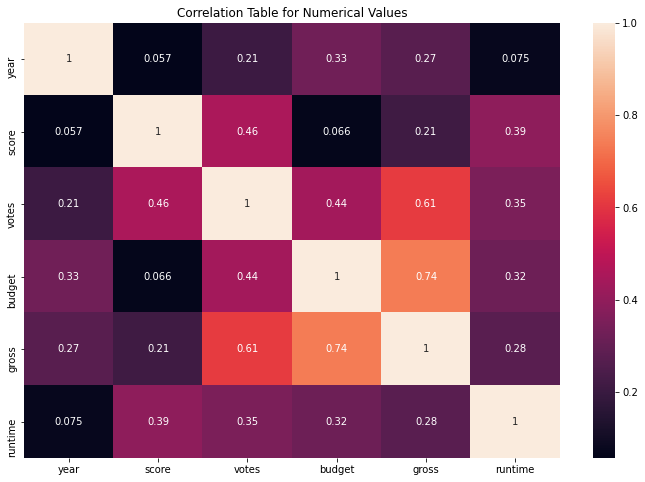

In [35]:
sns.heatmap(correlation_table, annot=True)

plt.title('Correlation Table for Numerical Values')
plt.show()

In [43]:
# Assign unique keys to strings in table to show correlations

df_num = df

for col_name in df_num.columns:
  if(df_num[col_name]).dtype == 'object':
    df_num[col_name] = df_num[col_name].astype('category')
    df_num[col_name] = df_num[col_name].cat.codes

df_num.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7,1100000,785,1263,1534,47,237000000,2847246203,1382,162
7445,388,5,0,2019,137,8,903000,105,513,1470,47,356000000,2797501328,983,181
3045,4909,5,6,1997,534,7,1100000,785,1263,1073,47,200000000,2201647264,1382,194
6663,3643,5,0,2015,529,7,876000,768,1806,356,47,245000000,2069521700,945,138
7244,389,5,0,2018,145,8,897000,105,513,1470,47,321000000,2048359754,983,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5,3500,585,2924,1498,47,3000000,5073,1385,96
2434,2969,5,0,1993,1467,4,1900,1805,3102,186,47,5000000,2970,1376,97
3681,1595,3,6,2000,1721,6,43000,952,1683,527,6,5000000,2554,466,108
272,2909,6,9,1982,1525,3,2300,261,55,1473,47,800000,2270,582,85


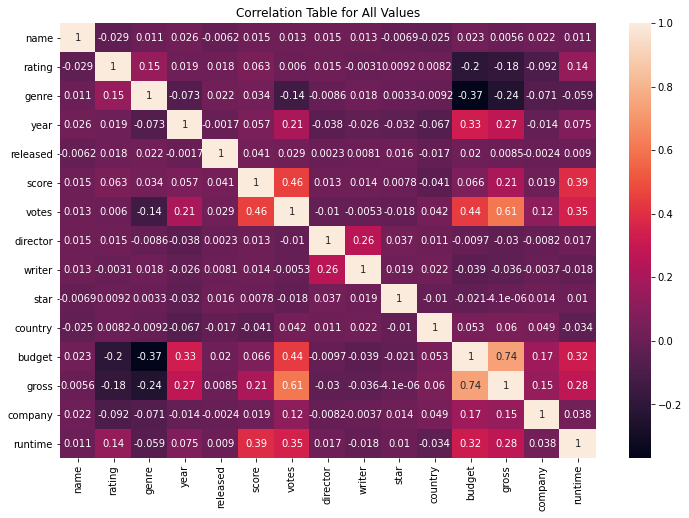

In [46]:
df_num_corr = df_num.corr()
sns.heatmap(df_num_corr, annot=True)

plt.title('Correlation Table for All Values')
plt.show()

For newly valued strings such as 

*   Star
*   Writer
*   Director
*   Company

any positive correlation shows that good writing and acting has a positive correlation with, for example, the rating or votes. Which is what one would expect. Even though relative to the correlation between budget and gross income, the number seems small. 



Company correlations are not 100% correct because there are multiple instances of the same company over many years because they've changed names. 

Maybe unexpectedly, budget has a negative correlation with rating and a very low correlation with score.

In [49]:
df_corr = df_num.corr()
df_pairs = df_corr.unstack()

pd.set_option('display.max_rows', None)

df_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.015473
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.063464
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [51]:
sorted_df_pairs = df_pairs.sort_values()
sorted_df_pairs

genre     budget     -0.368523
budget    genre      -0.368523
gross     genre      -0.244101
genre     gross      -0.244101
rating    budget     -0.203946
budget    rating     -0.203946
rating    gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
rating    company    -0.092357
company   rating     -0.092357
genre     year       -0.073167
year      genre      -0.073167
company   genre      -0.071334
genre     company    -0.071334
country   year       -0.066748
year      country    -0.066748
runtime   genre      -0.059237
genre     runtime    -0.059237
score     country    -0.040816
country   score      -0.040816
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
runtime   country    -0.034477
country   runtime    -0.034477
star      year       -0.032157
year      star       -0.032157
director

In [61]:
# Exploring correlation between budget/gross and company/star/actor

high_corr = sorted_df_pairs[(sorted_df_pairs) > .02]
high_corr

company   name        0.021697
name      company     0.021697
genre     released    0.022142
released  genre       0.022142
country   writer      0.022488
writer    country     0.022488
budget    name        0.023392
name      budget      0.023392
          year        0.025542
year      name        0.025542
votes     released    0.028833
released  votes       0.028833
score     genre       0.033833
genre     score       0.033833
star      director    0.036593
director  star        0.036593
runtime   company     0.037585
company   runtime     0.037585
released  score       0.041311
score     released    0.041311
country   votes       0.041551
votes     country     0.041551
country   company     0.048569
company   country     0.048569
budget    country     0.052977
country   budget      0.052977
score     year        0.057013
year      score       0.057013
gross     country     0.060078
country   gross       0.060078
score     rating      0.063464
rating    score       0.063464
budget  